In [23]:
import sys
sys.path.append("..")
from library import *

In [102]:
radii = np.array([0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05])

M = 4
tau = 3
psi0 = np.ones(4) * 0.5

energies = np.zeros(shape=(len(radii), 3))
fids = np.zeros(len(radii))

for i, radius in enumerate(radii):
    h2qc = H2QCircuit(m=M, tau=tau, trot_reps=10)
    h2qc.run_simulation(num_shots=1)
    qc_state = h2qc.final_state
    qc_state = normalize(qc_state[::2 ** (M * 2)])
    
    ham = h2qc.get_hamilt_op(n=2, radius=radius).to_matrix()
    qc_energy = get_energy(qc_state, ham)
    energies[i, 1] = qc_energy
    
    gs_energy, gs_state = get_ground_eigh(ham)
    energies[i, 0] = gs_energy
    
    ite_op = get_ite(ham, tau)
    ite_state = normalize(ite_op @ psi0)
    ite_energy = get_energy(ite_state, ham)
    energies[i, 2] = ite_energy
    
    fids[i] = get_fidelity(qc_state, gs_state)
    
    print(f"Simulation {i+1} for radius={radius:.2f} done!")
    

Simulation 1 for radius=0.25 done!
Simulation 2 for radius=0.30 done!
Simulation 3 for radius=0.35 done!
Simulation 4 for radius=0.40 done!
Simulation 5 for radius=0.45 done!
Simulation 6 for radius=0.50 done!
Simulation 7 for radius=0.55 done!
Simulation 8 for radius=0.65 done!
Simulation 9 for radius=0.75 done!
Simulation 10 for radius=0.85 done!
Simulation 11 for radius=0.95 done!
Simulation 12 for radius=1.05 done!


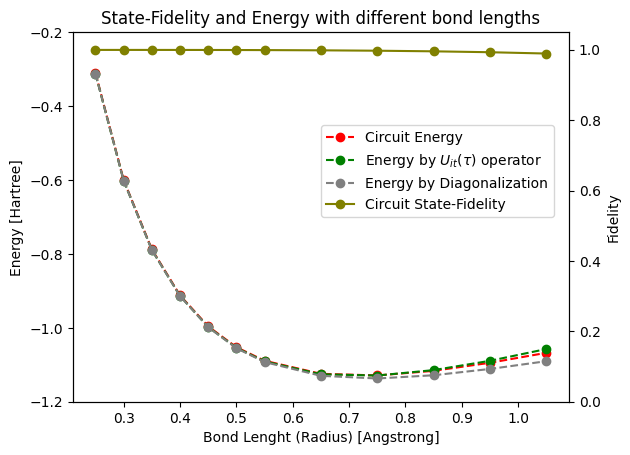

In [122]:
colors = ["olive", "red", "green", "gray"]

plot1 = plt.plot(radii, energies[:, 1], label="Circuit Energy", color=colors[1], marker='o', ls="--")
plot2 = plt.plot(radii, energies[:, 2], label=r"Energy by $U_{it}(\tau)$ operator", color=colors[2], ls="--", marker='o')
plot3 = plt.plot(radii, energies[:, 0], label="Energy by Diagonalization", color=colors[3], ls="--", marker='o')

plt.xlabel(r"Bond Lenght (Radius) [Angstrong]")
plt.ylabel(r"Energy [Hartree]")
plt.ylim(-1.2, -0.2)

y2 = plt.gca().twinx()
y2.set_ylim(0, 1.05)
y2.set_yticks(np.arange(0, 1.1, 0.2))
y2.set_yticklabels([f"{x:.1f}" for x in np.arange(0, 1.1, 0.2)])
y2.set_ylabel("Fidelity")
plot4 = plt.plot(radii, fids, label="Circuit State-Fidelity", color=colors[0], marker='o')
plt.legend(loc=(0.5, 0.5), handles=[plot1[0], plot2[0], plot3[0], plot4[0]]);

plt.title(r"State-Fidelity and Energy with different bond lengths");
plt.savefig("fig7.svg")


In [111]:
energies
print(radii)
print(energies)

[0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.75 0.85 0.95 1.05]
[[-0.31226791 -0.31023081 -0.31221595]
 [-0.6018059  -0.59990154 -0.60170432]
 [-0.78926986 -0.78737769 -0.78907391]
 [-0.91414827 -0.91212104 -0.91378277]
 [-0.9984162  -0.99608788 -0.99776404]
 [-1.05515998 -1.05235087 -1.05405137]
 [-1.09263018 -1.08915018 -1.09083523]
 [-1.12990427 -1.12447917 -1.12579974]
 [-1.13711727 -1.12889312 -1.12909309]
 [-1.12836323 -1.11641193 -1.11446774]
 [-1.11133894 -1.09462147 -1.08929464]
 [-1.09034138 -1.06767098 -1.05743941]]
